# Analisis preliminar del conjunto de datos

In [330]:
#Importaciones
import pandas as pd
import numpy as np

#Para llamar a archivos de otras carpetas
import sys
sys.path.append('..')

#Visualizar todas las columnas
pd.set_option('display.max_columns', None)


In [331]:
#Después importamos el archivo de funciones ('sp_limpieza.py') 
import src.sp_limpieza as sp
#Importamos importlib para poder recargar el módulo y reflejar los cambios actualizados
import importlib  
importlib.reload(sp) 

<module 'src.sp_limpieza' from 'c:\\Users\\pooo_\\Desktop\\Hackio\\proyecto_final_troncal\\analisis_eda_proyecto_final\\jupyters\\..\\src\\sp_limpieza.py'>

In [332]:
#Para interactuar con el sistema operativo
import os
#Devuelve la ruta del directorio actual
print(os.getcwd())

c:\Users\pooo_\Desktop\Hackio\proyecto_final_troncal\analisis_eda_proyecto_final\jupyters


In [333]:
#Librerías visualización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Transformación y limpieza de datos

### 1.1. Importación y visión general de los datos

In [334]:
#Leer los archivos
df_attendance = pd.read_csv("../data/data_raw/attendance.csv", index_col = 0)
df_homework = pd.read_csv("../data/data_raw/homework.csv", index_col = 0)
df_performance = pd.read_csv("../data/data_raw/performance.csv")
df_students = pd.read_csv("../data/data_raw/students.csv")
df_communication = pd.read_csv("../data/data_raw/communication.csv")

In [335]:
#Ver dataframe 'df_attendace'
df_att_preliminar =  sp.eda_preliminar(df_attendance)

,Date,Subject,Attendance_Status
Student_ID,,,
S00131,2024-05-15,English,excused
S06484,2024-09-29,History,absnt
S09146,2024-10-15,Math,Late
S03035,2024-12-18,Arabic,PRESENT
S04273,2024-12-01,Math,Present


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 364680 entries, S06592 to S12134
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date               364680 non-null  object
 1   Subject            364680 non-null  object
 2   Attendance_Status  364680 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB


None

____________________________
NULOS


Date                 0.0
Subject              0.0
Attendance_Status    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(347112)

____________________________
DESCRIBE


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Date,364680,366,2024-12-31,1075
Subject,364680,6,Math,61241
Attendance_Status,364680,8,PRESENT,45982


____________________________
VALUE COUNTS
Date
2024-12-31    1075
2024-05-05    1073
2024-09-06    1070
2024-08-06    1068
2024-09-22    1068
              ... 
2024-12-25     922
2024-05-09     921
2024-03-31     919
2024-12-07     917
2024-04-21     905
Name: count, Length: 366, dtype: int64
Subject
Math         61241
Science      60881
Arabic       60749
English      60684
Geography    60640
History      60485
Name: count, dtype: int64
Attendance_Status
PRESENT       45982
Absent        45751
Present       45632
Late          45509
 late         45508
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64
____________________________


In [336]:
#Quitar los espacios y pasar a misnuculas las tabla
df_attendance = sp.valores_a_minus(df_attendance)
df_attendance.sample(10)

,date,subject,attendance_status
student_id,,,
s07093,2024-03-29,geography,left early
s07841,2024-11-16,english,absent
s02847,2024-04-10,science,absnt
s01178,2024-11-28,history,present
s03308,2025-03-08,english,absnt
s07011,2024-11-02,arabic,excused
s02653,2024-03-11,science,present
s00625,2024-12-27,geography,present
s04069,2024-10-09,english,excused


In [337]:
#Ver en la columna attendance_status que valores tiene.
conteo = df_attendance['attendance_status'].value_counts()
conteo

attendance_status
present       91614
late          91017
absent        45751
absnt         45478
left early    45435
excused       45385
Name: count, dtype: int64

In [338]:
#Corregimos el valor 'absnt' por 'absent' y comprobamos los resultados de la columna
df_attendance['attendance_status'] = df_attendance['attendance_status'].replace('absnt','absent')


conteo = df_attendance['attendance_status'].value_counts()
conteo
#Ya tenemos los valores de esta columna corregidos.

attendance_status
present       91614
absent        91229
late          91017
left early    45435
excused       45385
Name: count, dtype: int64

In [339]:
#Cambiar nombre de columna 'date' para hacerla mas descriptiva y 'attendace_status' para hacerla mas corta.
df_attendance.rename(columns={'date':'att_date', 'attendance_status':'att_status'}, inplace= True)

In [340]:
# Como la columna 'date' es de tipo 'Object' vamos a pasarla a tipo Datetime y comprobamos el tipo de dato que sea correcto
df_attendance['att_date'] = pd.to_datetime(df_attendance['att_date'], errors = 'coerce')
print(df_attendance['att_date'].dtype)

datetime64[ns]


In [341]:
#Comprobamos el resto de columnas que sean de tipo correcto.
print(df_attendance.dtypes)

att_date      datetime64[ns]
subject               object
att_status            object
dtype: object


In [342]:
#Ver dataframe 'df_homework'
df_hw_preliminar =  sp.eda_preliminar(df_homework)
df_hw_preliminar

,Subject,Assignment_Name,Due_Date,Status,Grade_Feedback,Guardian_Signature
Student_ID,,,,,,
S01686,History,Month rest available.,2024-12-07,not done,A+,Yes
S05596,Science,Save quickly threat.,2024-12-25,Done,B,No
S05457,Arabic,Sort direction.,2024-11-25,Done,A,Yes
S10592,Arabic,Yourself between.,2025-02-09,Done,B,Yes
S09976,Arabic,Up soldier.,2024-11-22,❌,B-,No


____________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 60780 entries, S12002 to S08589
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject             60780 non-null  object
 1   Assignment_Name     60780 non-null  object
 2   Due_Date            60780 non-null  object
 3   Status              60780 non-null  object
 4   Grade_Feedback      60780 non-null  object
 5   Guardian_Signature  60780 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


None

____________________________
NULOS


Subject               0.0
Assignment_Name       0.0
Due_Date              0.0
Status                0.0
Grade_Feedback        0.0
Guardian_Signature    0.0
dtype: float64

____________________________
DUPLICADOS


np.int64(0)

____________________________
DESCRIBE


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
DESCRIBE COLUMNAS OBJECT


,count,unique,top,freq
Subject,60780,6,English,10209
Assignment_Name,60780,56065,Also.,15
Due_Date,60780,366,2025-01-23,315
Status,60780,6,Done,10278
Grade_Feedback,60780,8,A+,7709
Guardian_Signature,60780,3,No,20372


____________________________
VALUE COUNTS
Subject
English      10209
Geography    10179
Science      10112
History      10110
Arabic       10106
Math         10064
Name: count, dtype: int64
Assignment_Name
Also.                      15
Term.                      15
Understand.                13
Not.                       13
Eye.                       12
                           ..
Effect job amount.          1
Study indicate fight.       1
Reach whose investment.     1
Suggest figure.             1
Involve determine.          1
Name: count, Length: 56065, dtype: int64
Due_Date
2025-01-23    315
2025-03-02    302
2024-11-06    301
2024-11-08    300
2024-12-25    299
             ... 
11/04/2024     52
10/13/2024     51
12/21/2024     50
11/22/2024     50
03/01/2025     46
Name: count, Length: 366, dtype: int64
Status
 Done       10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64
Grade_Feedback
A+    7709
B-    7639

In [343]:
#Pasar dataframe a minusculas
df_homework = sp.valores_a_minus(df_homework)
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s00818,history,yes important maintain.,2025-01-04,✅,a,no
s05025,history,sometimes assume.,2025-02-05,pending,a+,no
s06733,science,could can despite.,2025-02-03,not done,c,
s07464,math,else because.,11/23/2024,❌,c,no
s09023,history,relate serious explain.,2025-01-22,pending,c,no
s08681,english,attention loss happy.,2024-10-12,✅,b-,yes
s06725,history,unit age.,2024-10-11,✅,b,yes
s10390,arabic,bit we effort.,2025-03-04,✅,b,
s05787,arabic,build politics.,11/18/2024,not done,c,


In [344]:
#La columna 'due_date' tiene valores de fecha con diferentes formatos.
# Hay que pasarlo a un formato y asignalo como de tipo datetime.

df_homework['due_date'] = pd.to_datetime(df_homework['due_date'], errors='coerce')
df_homework.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60780 entries, s12002 to s08589
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   subject             60780 non-null  object        
 1   assignment_name     60780 non-null  object        
 2   due_date            48422 non-null  datetime64[ns]
 3   status              60780 non-null  object        
 4   grade_feedback      60780 non-null  object        
 5   guardian_signature  60780 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 3.2+ MB


In [345]:
df_homework.sample(10)

,subject,assignment_name,due_date,status,grade_feedback,guardian_signature
student_id,,,,,,
s08964,geography,away carry issue.,2024-09-13,not done,c-,no
s00857,history,fill agreement.,2024-09-28,✅,f,no
s06581,science,exactly lose early.,NaT,not done,a,
s02429,science,sign itself.,2025-03-07,pending,b,
s06383,english,report thing inside.,2025-01-22,not done,f,no
s06233,history,there.,2024-12-24,✅,c,yes
s07969,history,step.,NaT,not done,c-,no
s02768,arabic,owner every here.,NaT,not done,f,yes
s03582,science,conference personal likely.,2025-02-12,not done,a,yes


In [346]:
#Sacar nulos de la columna 'due_date' mediante funcion de sp.limpieza.py
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject                   0
assignment_name           0
due_date              12358
status                    0
grade_feedback            0
guardian_signature        0
dtype: int64, subject                0.00
assignment_name        0.00
due_date              20.33
status                 0.00
grade_feedback         0.00
guardian_signature     0.00
dtype: float64)


In [347]:
#🔴🔴PUEDE QUE ESTA FUNCION NO SEA NECESARIA AQUI,PROBARLA EN OTRO DATAFRAME
#Comprobamos mediante esta funcion tambien como la columna 'due_date' rebasa el umbral 10. 

high_nulls_colmn, low_nulls_colmn = sp.nulos_umbral(df_homework)
print(high_nulls_colmn)

,Column,Datatype,NullsCount,Nulls%
0,due_date,datetime64[ns],12358,20.332346


['due_date']


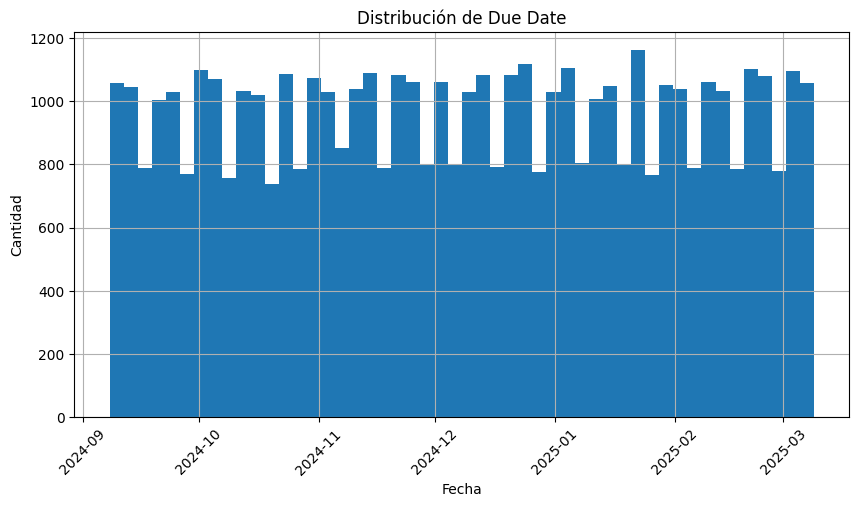

In [348]:
#🔴🔴 VALORAR SI ESTO MERECE O ME QUEDO SOLO CON LA CELDA DE ABAJO, QUE PONE --> describe().
# La columna 'due_date' tiene una cantidad elevada de nulos (20.33%) por lo que antes de imputarla comprobamos
#como es la distribución de sus valores para poder así valorar si imputar los nulos, si por media, moda o mediana.

df_homework['due_date'].hist(bins=50, figsize=(10,5))
plt.title('Distribución de Due Date')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


In [349]:
print(df_homework['due_date'].describe())

count                            48422
mean     2024-12-08 09:02:43.710710016
min                2024-09-08 00:00:00
25%                2024-10-24 00:00:00
50%                2024-12-09 00:00:00
75%                2025-01-23 00:00:00
max                2025-03-09 00:00:00
Name: due_date, dtype: object


In [350]:
#Dado que las fechas están bastante centradas en torno a finales de 2024, lo más razonable sería:
# Imputar con la mediana (50%), que es 2024-12-09, ya que la mediana es robusta frente a outliers y nos va a evitar 
# en caso de haber un par de fechas raras que el resultado no se distorsione demasiado.

mediana_fecha = df_homework['due_date'].median()
df_homework['due_date'].fillna(mediana_fecha, inplace= True)


C:\Users\pooo_\AppData\Local\Temp\ipykernel_18604\3655258861.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['due_date'].fillna(mediana_fecha, inplace= True)


In [351]:
#Comprobamos que los nulos han desaparecido
nulos = sp.nulos_num_porcentaje(df_homework)
print(nulos)

(subject               0
assignment_name       0
due_date              0
status                0
grade_feedback        0
guardian_signature    0
dtype: int64, subject               0.0
assignment_name       0.0
due_date              0.0
status                0.0
grade_feedback        0.0
guardian_signature    0.0
dtype: float64)


In [352]:
#Para coregir la columna 'status' vamos a comprobar primero el tipo de valores que tiene.

status_valores = df_homework['status'].value_counts()
status_valores

status
done        10278
not done    10234
❌           10151
✔           10090
pending     10014
✅           10013
Name: count, dtype: int64

In [353]:
#Vamos a homogeinizar esos valores. 

mapeo_status = {
    '✅':'done',
    '❌':'not done',
    '✔':'done',
    'pending':'pending',
    'done':'done',
    'not done':'not done',
}

df_homework['status'] = df_homework['status'].replace(mapeo_status)

status_valores = df_homework['status'].value_counts()
status_valores


status
done        30381
not done    20385
pending     10014
Name: count, dtype: int64

In [354]:
#Debemos comprobar la columna 'guardian_signatura' ya que tiene campos vacíos que pandas
# lo detecta como cadena de texto vacía.
valores = df_homework['guardian_signature'].value_counts()
print(valores)

guardian_signature
no     20372
yes    20348
       20060
Name: count, dtype: int64


In [355]:
#Debemos de convertir la cadena vacia por nulos de numpy. Después vamos a comprobar cuantos nulos son.
df_homework['guardian_signature'] = df_homework['guardian_signature'].replace('', np.nan)
ver_nulos= sp.nulos_num_porcentaje(df_homework['guardian_signature'])
ver_nulos

(np.int64(20060), np.float64(33.0))

In [356]:
#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts(dropna=False, normalize=True)*100)

guardian_signature
no     33.517604
yes    33.478118
NaN    33.004278
Name: proportion, dtype: float64


In [357]:
#Hay un 33% de nulos de la columna 'guardian_signature' por tanto vamos a ver sus cuartiles, media etc.
print(df_homework['guardian_signature'].describe())

count     40720
unique        2
top          no
freq      20372
Name: guardian_signature, dtype: object


In [358]:
#Vamos a imputar los nulos con 'unknown' ya que así no modificamos artificialmente la proporción original y
# dejamos constancia de que falta esta información.

df_homework['guardian_signature'].fillna('unknown', inplace = True)

#Comprobamos la distribución (en porcentaje) de los 3 valores de la columna.
print(df_homework['guardian_signature'].value_counts())

guardian_signature
no         20372
yes        20348
unknown    20060
Name: count, dtype: int64


C:\Users\pooo_\AppData\Local\Temp\ipykernel_18604\2920811997.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_homework['guardian_signature'].fillna('unknown', inplace = True)


### 1.2. Eliminar columnas redundantes o irrelevantes

### 1.3. Homogeinizar los nombres de las columnas

### 1.4. Homogeinizar datos categóricos

### 1.5. Cambio tipo de datos y gestión de nulos

### 1.6. Combinar ambas tablas

# 2. Análisis descriptivo de los datos

### 2.1. Resumen estadístico 

# 3. Visualización de los datos.

### 3.1. Histogramas para la distribución de variables numéricas

### 3.2. Boxplots para detectar outliers

### 3.3. Gráficos de barras para variables categóricas

### 3.4. Heatmap de correlaciones

# 4. Guardar archivos limpios